In [ ]:
''''
Input Data: 
1. CST segmentation  
2. Tumor segmentation
3. TMS hits segmentation (M1)

From the input data, this pipeline should calculate:
1. Tumor-tract distance (mm)
2. M1 involvement (mm2)

''''

In [2]:
pwd

'/dhc/home/shahryar.khorasani/neurosugery_pipeline/neurosurgery_pipeline'

In [3]:
import nibabel as nib

In [4]:
import numpy as np

In [7]:
from fast_mri_view import *

In [1]:
from scipy.spatial import distance, ConvexHull, Delaunay
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import pandas as pd
from fast_mri_view import *
import nibabel as nib
from mri_utils import *

ModuleNotFoundError: No module named 'mri_utils'

In [13]:
t1_reg = nib.load('/dhc/groups/charite-brains/original/niftis/mr539/t1c/t1c_brain.nii.gz').get_fdata()

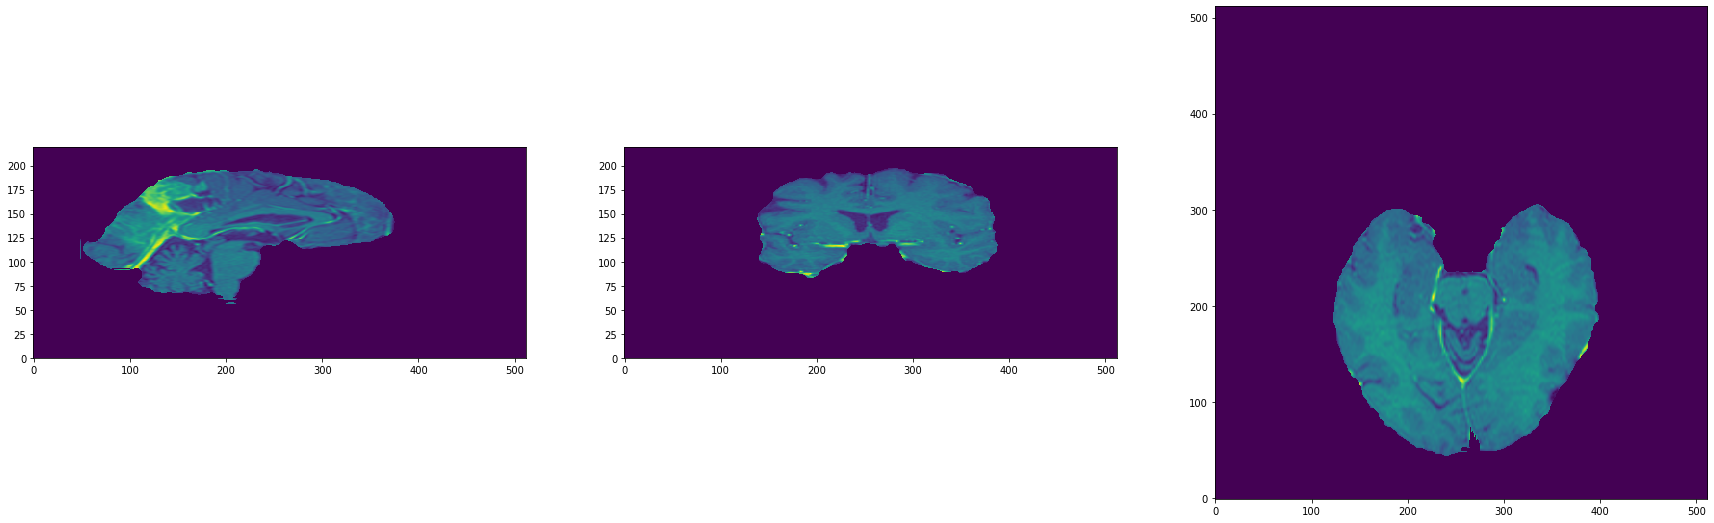

In [14]:
show_slices(t1_reg)

In [10]:
t1_re_data = t1_reg.get_data()

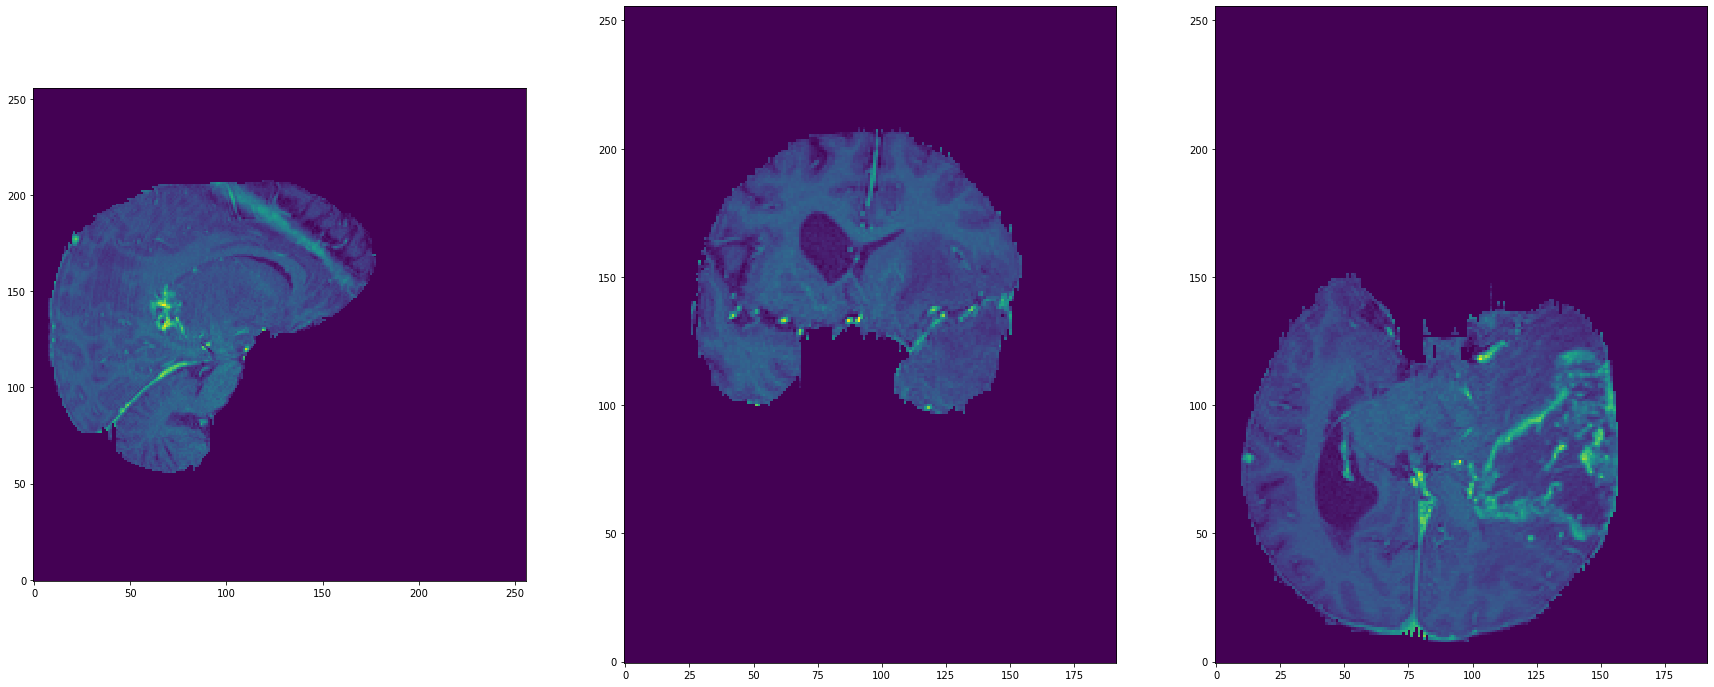

In [13]:
show_slices('/home/Shahryar.Khorasani/netstore/tms/registration/validated_432/t1c_masked.nii.gz')

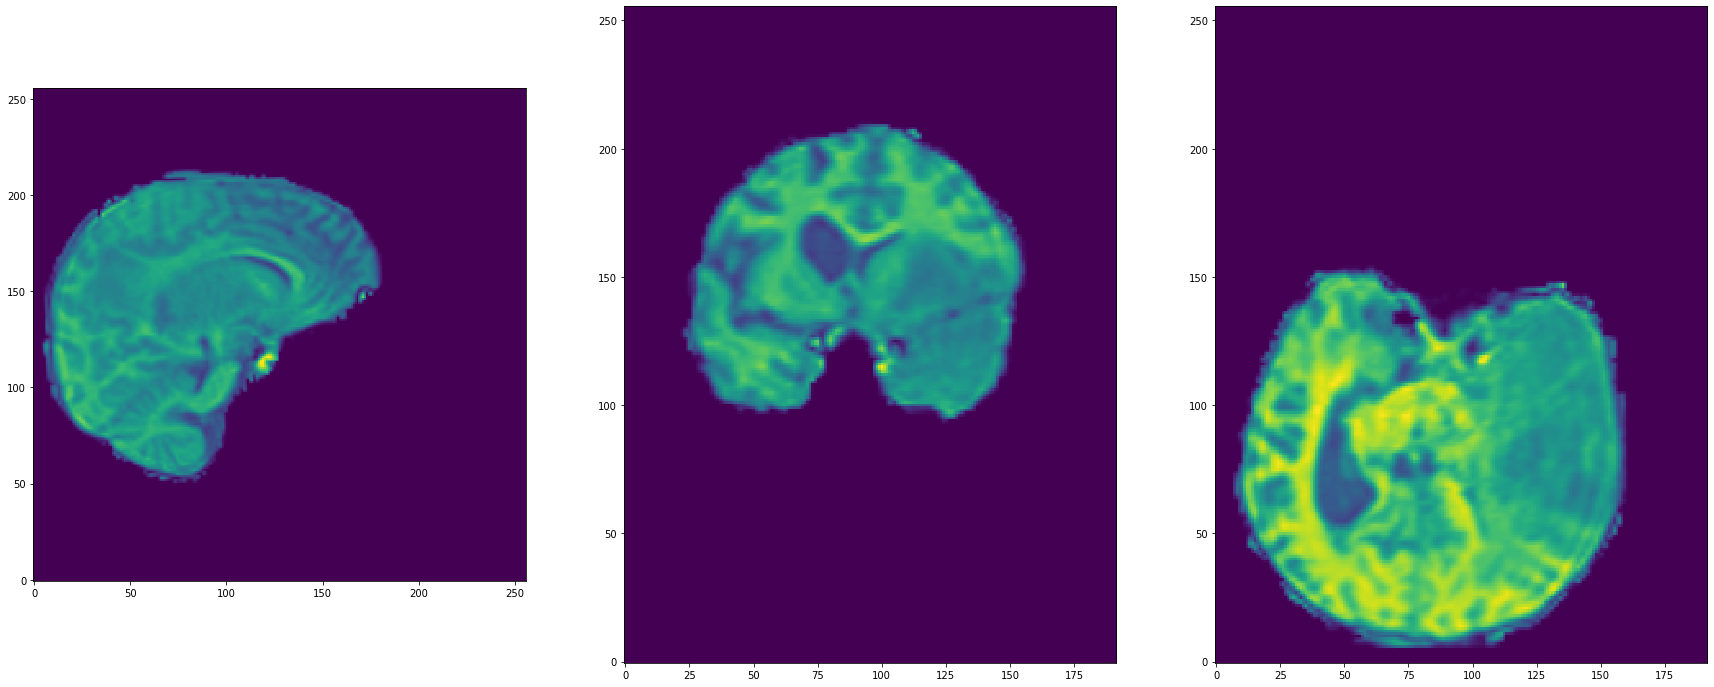

In [11]:
show_slices(t1_re_data)

In [2]:
from skimage.draw import polygon

In [3]:
import timeit

In [4]:
from nipype.algorithms import metrics

210304-08:36:41,299 nipype.utils INFO:
	 Running nipype version 1.4.1 (latest: 1.5.1)


In [ ]:
# distance between tumor and tract 
#probably I should use l1? and min()
distance.cdist(metric='minkowski') #or 'cityblock' ?

A = np.zeros((10,10,10))

A[0:2, 4:6, 7:9]=1

B = np.zeros((10,10,10))
B[7:10, 2:4, 6:8]=1

resh_A = A.reshape(2,-1)
resh_B = B.reshape(2,-1)

d = distance.cdist(resh_A, resh_B, 'minkowski')

d

In [50]:
scan = nib.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tract_seg_ras_hand.nii').get_data()
seg = scan == scan.max()
seg=seg.astype(int)

#nib.save(seg, '/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_hand/tract_hand_mask.nii')

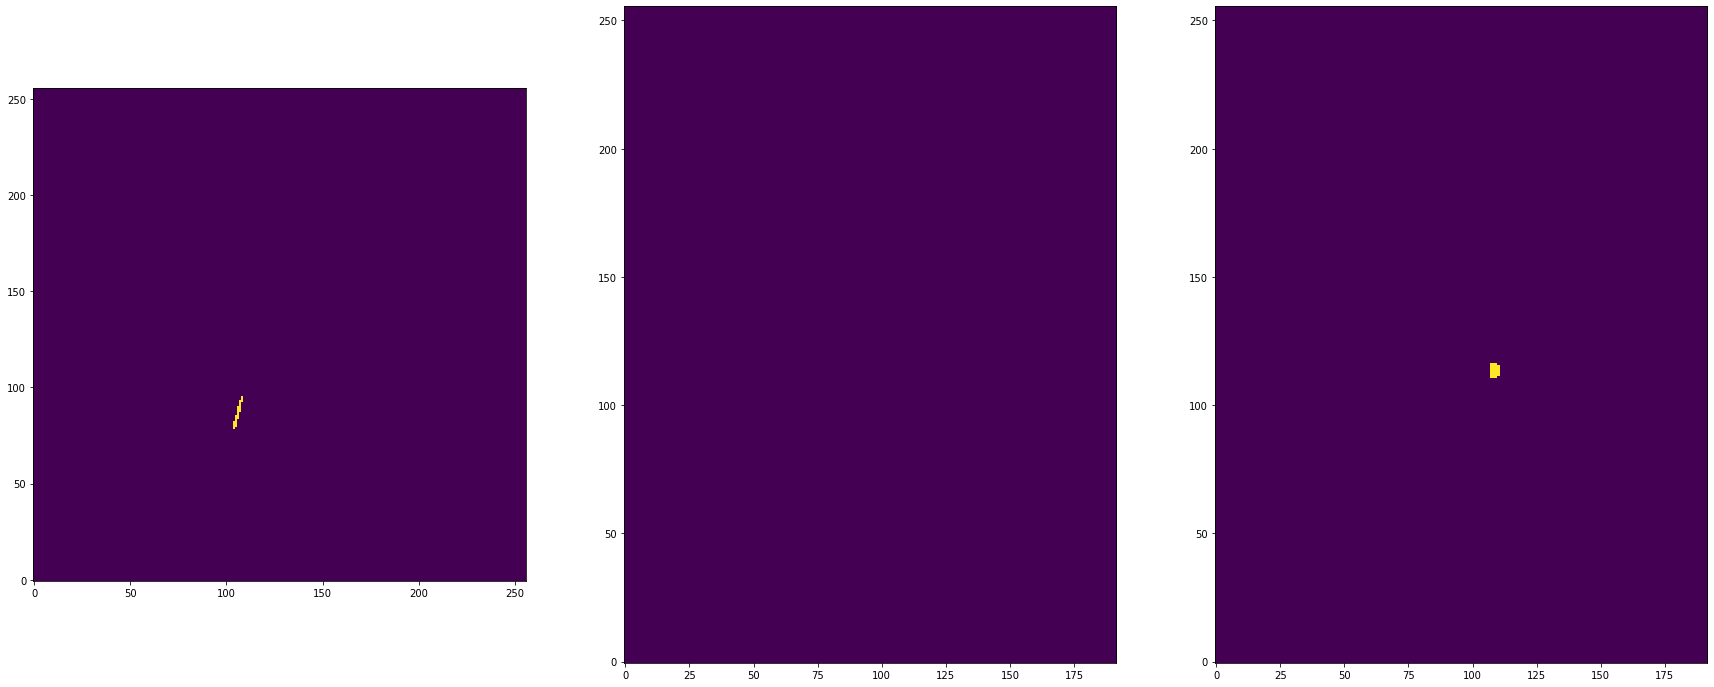

In [2]:
tract_seg_face = nib.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_face/tract_seg_face.nii')
scan = nib.as_closest_canonical(tract_seg_face)
nib.save(scan, '/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_face/tract_seg_ras_face.nii')

tract_seg_hand = nib.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_hand/tract_seg_hand.nii')
scan = nib.as_closest_canonical(tract_seg_hand)
nib.save(scan, '/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_hand/tract_seg_ras_hand.nii')

tract_seg_leg = nib.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_leg/tract_seg_leg.nii')
scan = nib.as_closest_canonical(tract_seg_leg)
nib.save(scan, '/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_leg/tract_seg_ras_leg.nii')

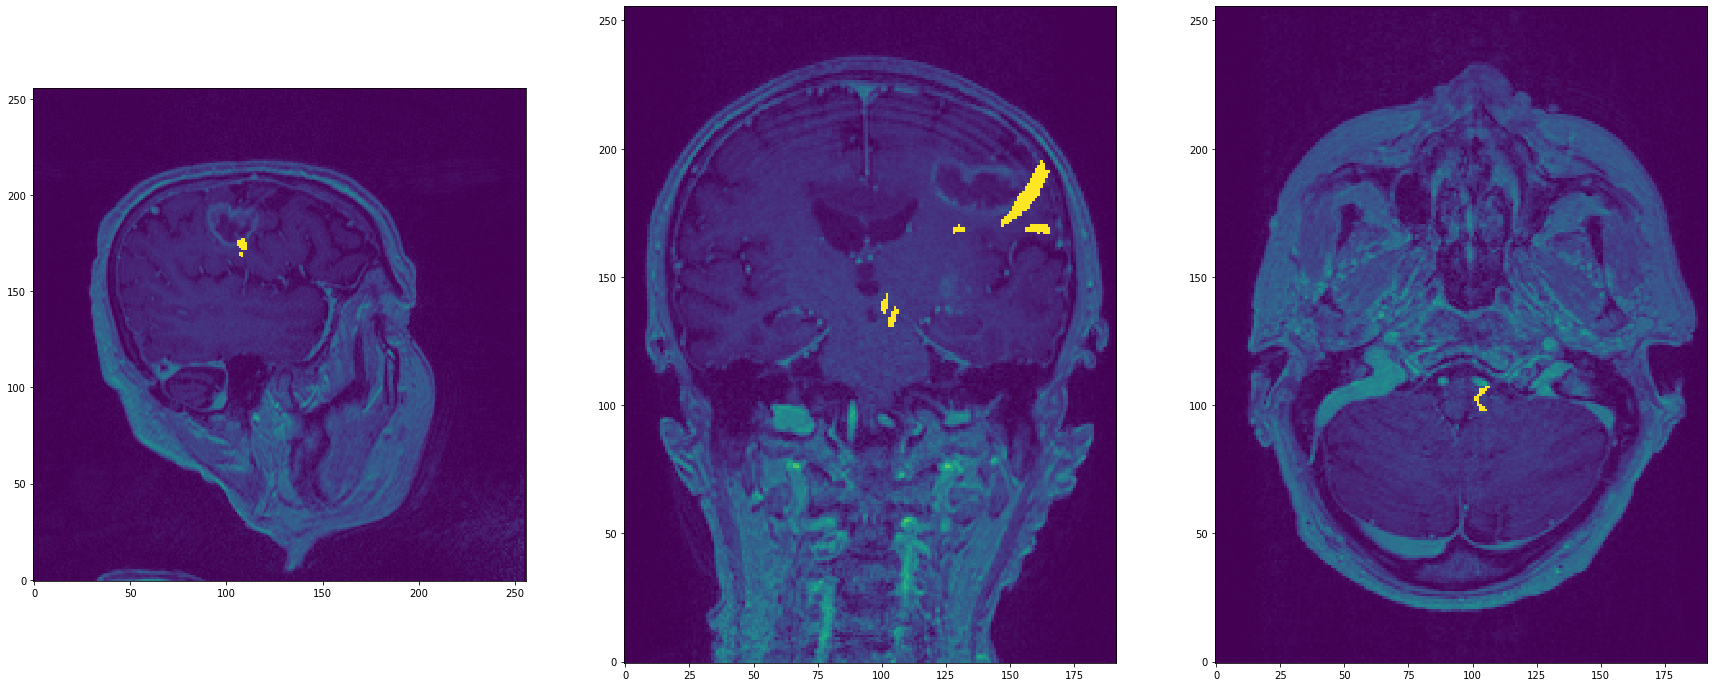

In [15]:
show_slices('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tract_seg_ras_face.nii',x=150,y=110,z=93)

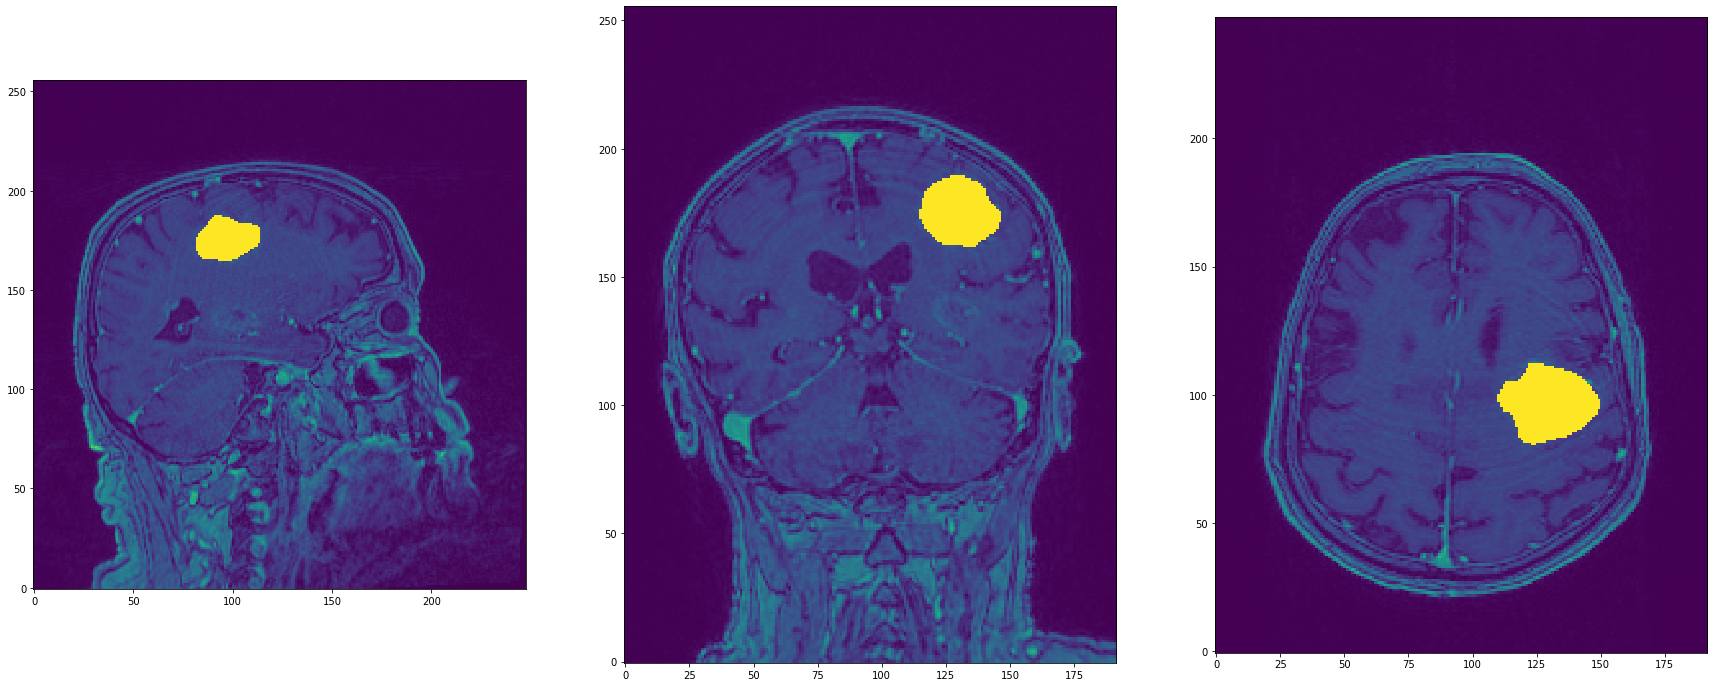

In [14]:
show_slices('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/seg_ras.nii', x=120, y=90,z= 170)

In [15]:
tract = nib.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/tract_seg_face/tract_seg_ras_face.nii')

In [108]:
tumor_640 = nib.load('/mnt/projects/charite-brains/original/dicoms/mr640/seg/Study1/seg.nii')

In [116]:
scan = '/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tract_seg_ras_hand.nii'
data = nib.load(scan)
scan = data.get_data()
seg = scan == scan.max()
seg=seg.astype(int)
seg = nib.Nifti1Image(seg, data.affine)
seg = rescale_img(seg)
if seg.shape != (256,256,192):
    seg = padcrop(seg,( 256,256,192))
seg = np.rint(seg)
seg = seg.astype(int)
np.save('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tract_mask_hand.npy', seg)

In [110]:
scan = '/mnt/projects/charite-brains/original/dicoms/mr640/seg/Study1/seg.nii'
data = nib.load(scan)
scan = data.get_data()
seg = scan == scan.max()
seg=seg.astype(int)
seg = nib.Nifti1Image(seg, data.affine)
seg = rescale_img(seg)
if seg.shape != (256,256,192):
    seg = padcrop(seg,( 256,256,192))
seg = np.rint(seg)
seg = seg.astype(int)
np.save('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tumor_mask.npy', seg)

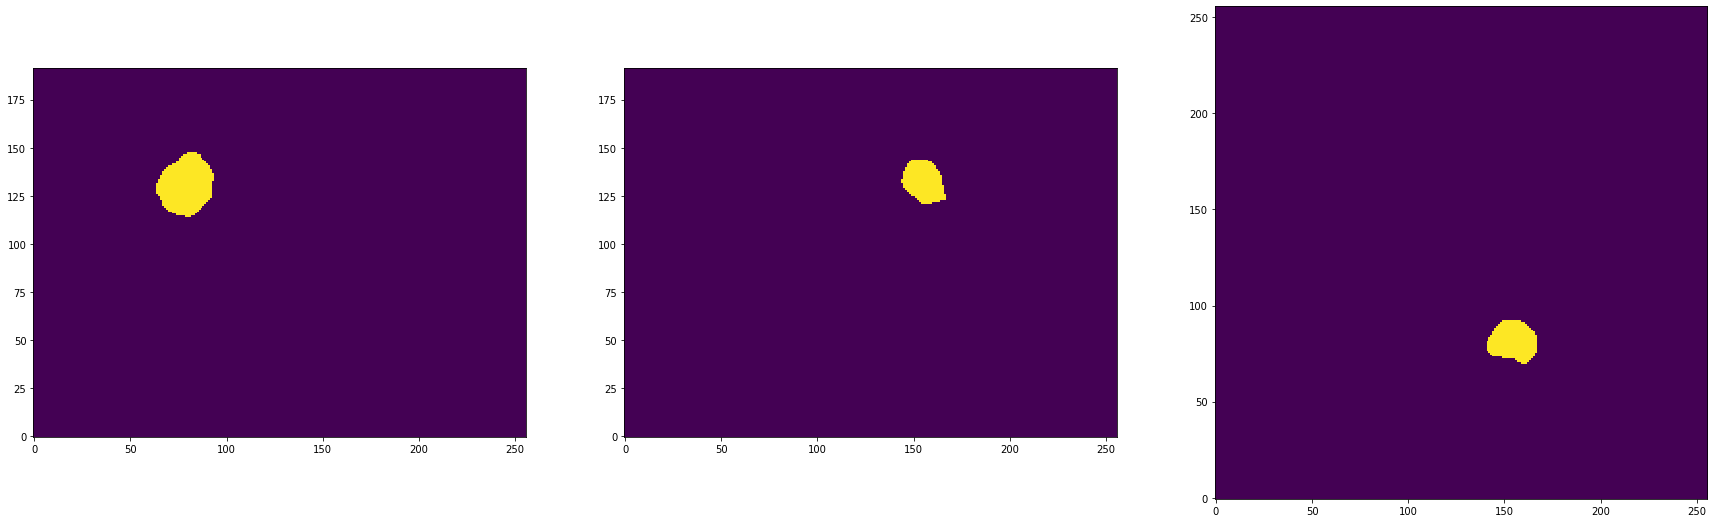

In [114]:
tumor = np.load('/home/Shahryar.Khorasani/netstore/tract_seg_example/outcomes/tumor_mask.npy')
show_slices(tumor, x=160, y=90,z= 140)

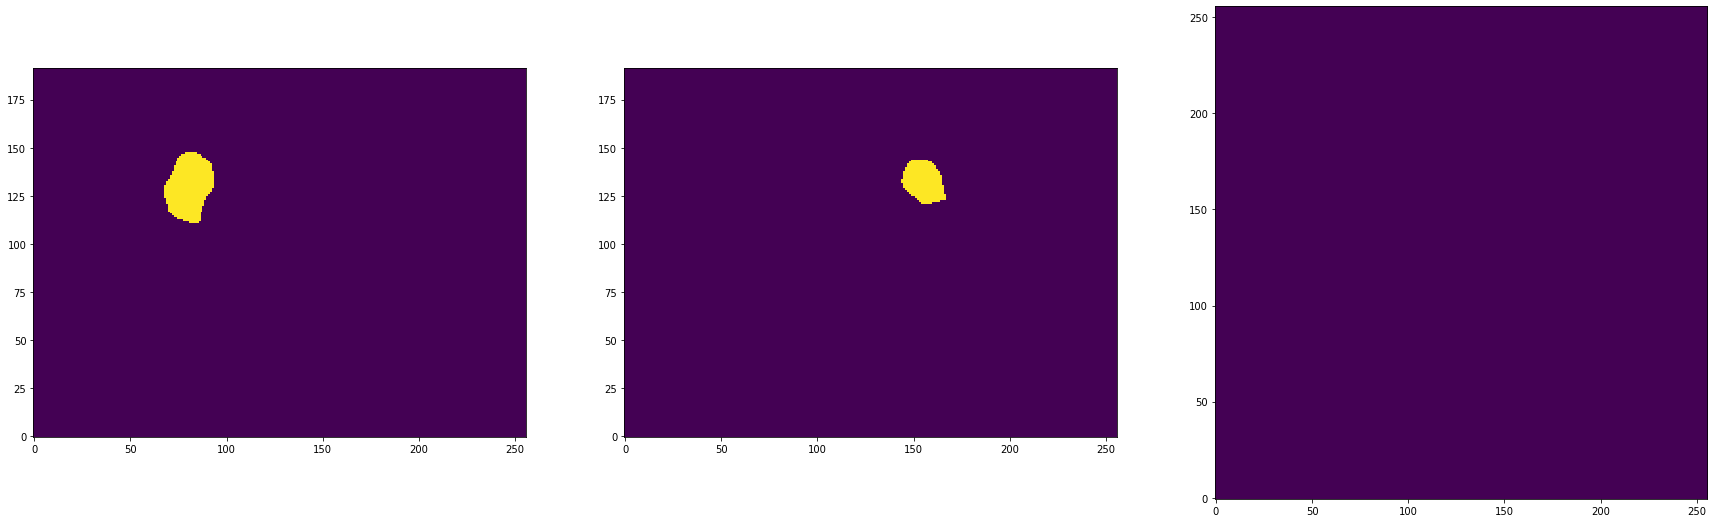

In [124]:
show_slices(tumor, x=150,y=90,z=93)

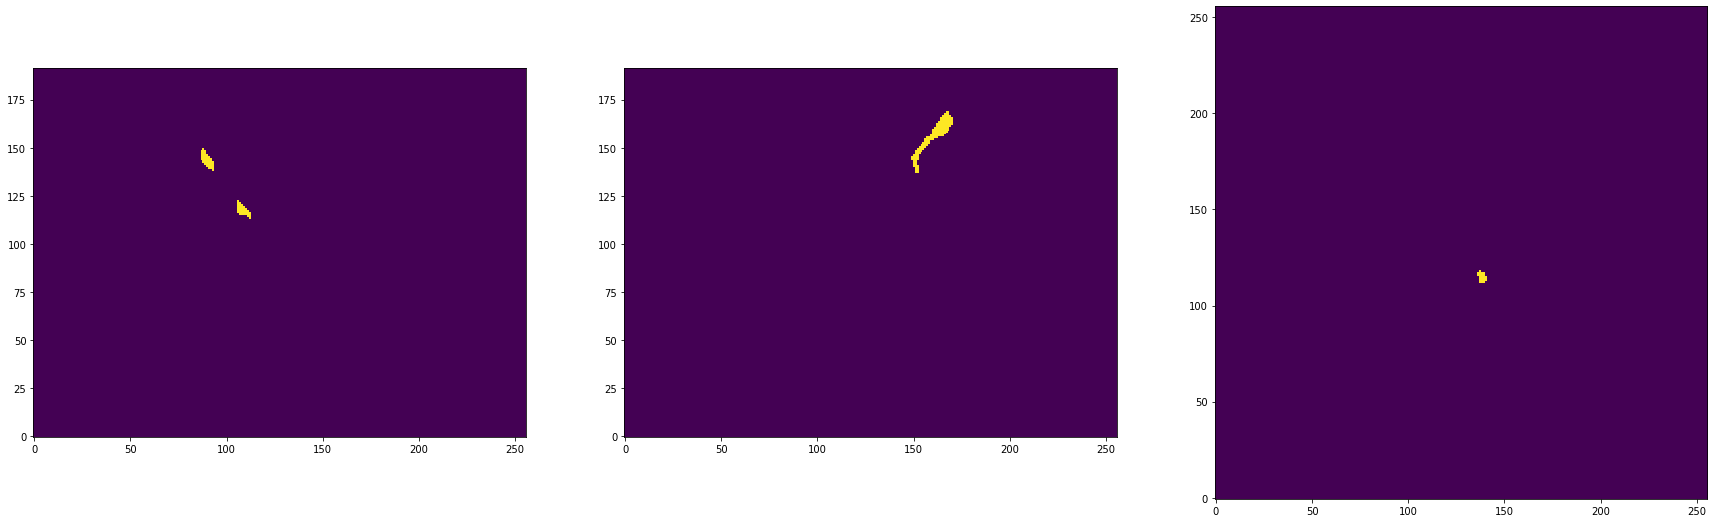

In [156]:
show_slices(seg, x=150,y=90,z=93)

In [135]:

tumor_reshaped = tumor.reshape(2,-1)
seg_reshape = seg.reshape(2,-1)
#distance.cdist(tumor_reshaped, seg_reshape, metric='Hausdorff')
distance.directed_hausdorff(tumor_reshaped, seg_reshape)

(133.29291053915807, 1, 0)

In [160]:
distance.directed_hausdorff(seg_reshape, tumor_reshaped)

(50.368641037852115, 1, 0)

In [163]:
distance.directed_hausdorff(tms_reshaped, tumor_reshaped)

(33.49626844888845, 0, 0)

In [162]:
distance.directed_hausdorff(tumor_reshaped, tms_reshaped)

(133.29291053915807, 1, 1)

In [224]:
u = np.array([(1.0, 0.0),
              (0.0, 1.0),
              (-1.0, 0.0),
              (0.0, -1.0)])
v = np.array([(2.0, 0.0),
              (0.0, 2.0),
              (-2.0, 0.0),
              (0.0, -4.0)])

In [225]:
distance.directed_hausdorff(u,v)

(2.23606797749979, 3, 0)

In [226]:
distance.directed_hausdorff(v,u)

(3.0, 3, 3)

In [227]:
np.where(u==1)

(array([0, 1]), array([0, 1]))

In [211]:
np.where(w==1)

(array([0]), array([4]))

In [259]:
u = np.array([(0, 0, 0, 0, 0),
              (0, 0, 0, 0, 0),
              (0, 0, 0, 0, 0),
              (1, 1, 0, 0, 0)])
w = np.array([(0, 0, 0, 0, 1),
              (0 ,0, 0, 0, 0),
              (0, 0, 0, 0, 0),
              (0, 0, 0, 0, 0)])

In [260]:
u

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0]])

In [261]:
w

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [262]:
distance.directed_hausdorff(np.where(w==1),np.where(u==1))

ValueError: u and v need to have the same number of columns

In [252]:
distance.directed_hausdorff(np.where(u==1),np.where(w==1))

(1.0, 0, 1)

In [253]:
distance.cdist(np.where(w==1),np.where(u==1))

array([[3., 0.],
       [1., 4.]])

In [101]:
from sklearn.metrics import pairwise_distances

In [133]:
def make_TMS_block(scan):
    # extracts and unifies the TMS points from an MRI
    if type(scan) == str: 
        scan = nib.load(scan)
        scan = scan.get_fdata()
    elif type(scan) == np.array:
        scan = scan
    
    # extract TMS points, they have the highest voxel value 
    filtered = scan == scan.max()
    filtered = filtered.astype(int)

    x,y,z= np.where(filtered == 1)    
    #create polygons from different angles (X,Y,Z)
    xx, yx = polygon(x,y)
    yz, zy = polygon(y,z)
    xz, zz = polygon(x,z)
    
    img = np.zeros(filtered.shape)
    #create a block that contains all tms points
    img[xx.min():xx.max(), yz.min():yz.max(), zz.min():zz.max()] = 1
    return img

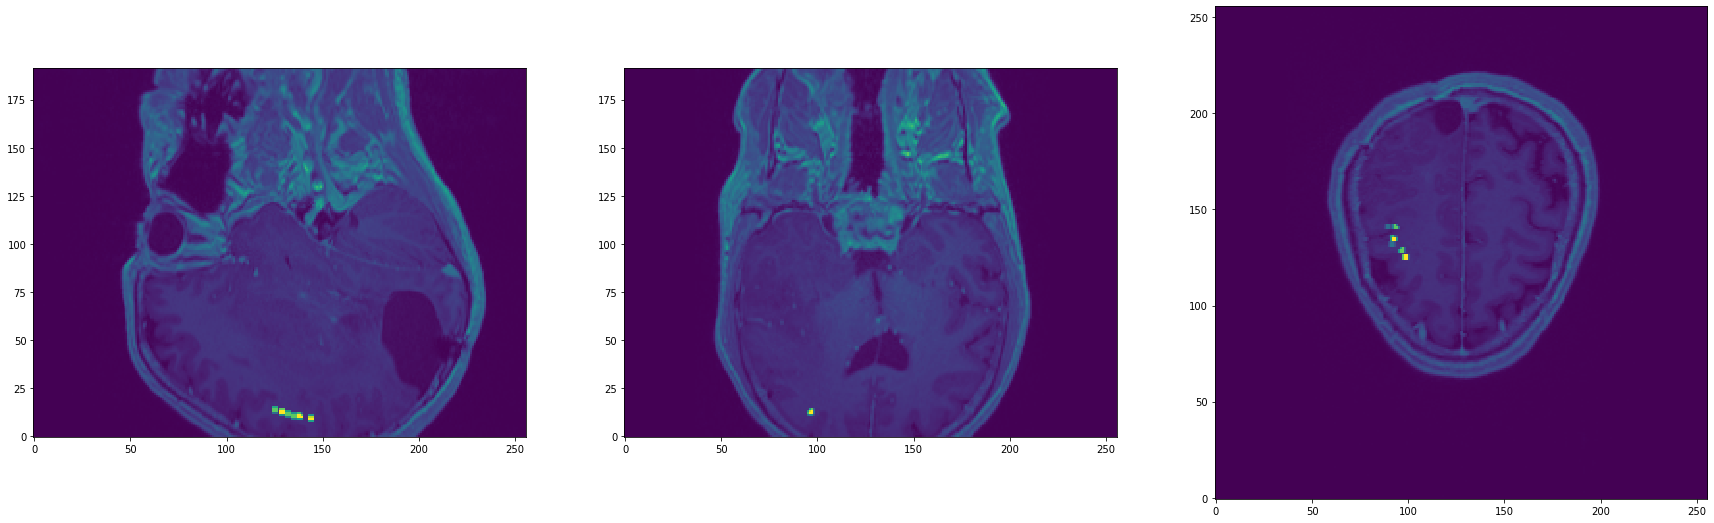

In [6]:
scandir = nib.load('./t1_tms_burnedinexample.nii')
show_slices(scandir.get_data(), x=97,y=130,z=14)

-3.603566437959671e-05


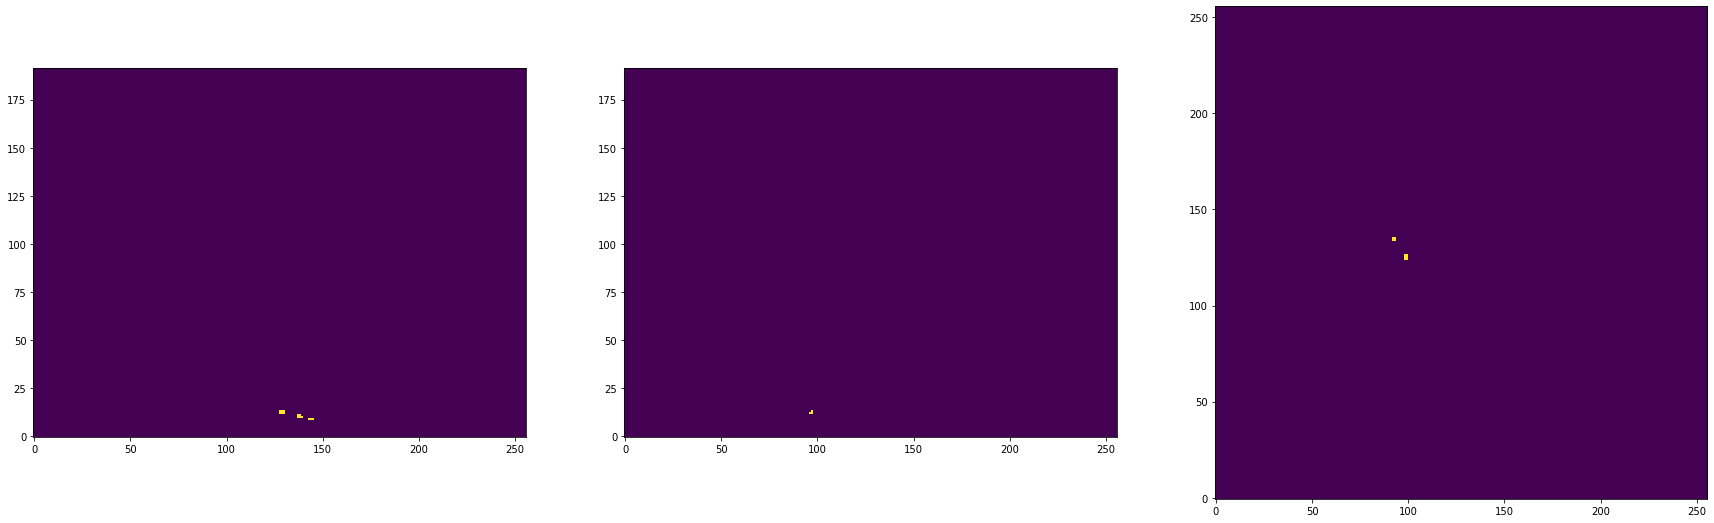

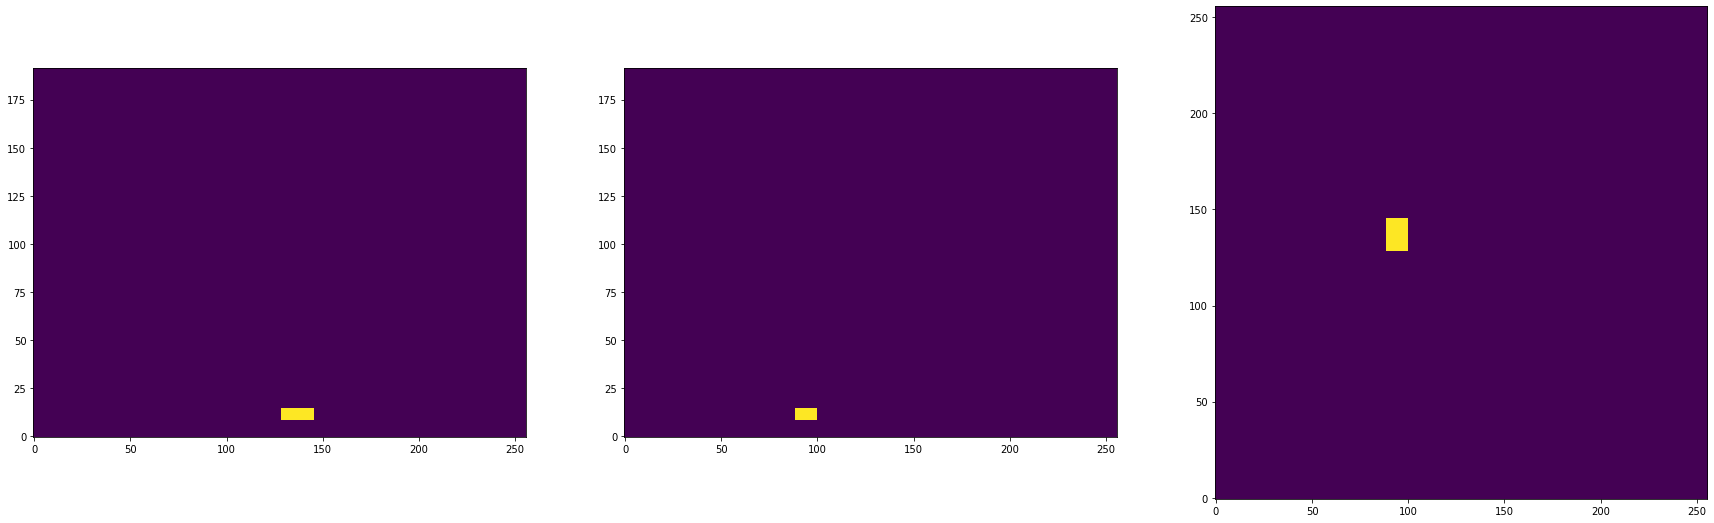

In [99]:
# sample script for extracting and unifying TMS points into a cube.   

scandir = nib.load('./t1_tms_burnedinexample.nii')

start = timeit.timeit()

scan = scandir.get_data()

filtered = scan == scan.max()
filtered = filtered.astype(int)


x,y,z= np.where(filtered == 1)

xx, yx = polygon(x,y)
yz, zy = polygon(y,z)
xz, zz = polygon(x,z)

img = np.zeros((256,256,192))
img[xx.min():xx.max(), yz.min():yz.max(), zz.min():zz.max()] = 1
end = timeit.timeit()
print(end - start)
show_slices(filtered, x=97,y=130,z=14)
show_slices(img, x=97,y=130,z=14)

In [291]:
# this could be the way to calculate distance between two segmentations. just have to check with a ground truth data
#write the function here:

x, y ,z = np.where(tumor == 1)
tumor_coords = np.array((x,y,z))
tumor_coords=tumor_coords.transpose()
print(tumor_coords.shape)


x, y ,z = np.where(img == 1)
tms_coords = np.array((x,y,z))
tms_coords=tms_coords.transpose()
print(tms_coords.shape)

x, y ,z = np.where(seg == 1)
tract_coords = np.array((x,y,z))
tract_coords=tract_coords.transpose()
print(tract_coords.shape)

(17767, 3)
(1122, 3)
(2537, 3)


In [295]:
print(distance.cdist(tumor_coords, tms_coords).min())
print(distance.cdist(tumor_coords, tms_coords).mean())
print(distance.cdist(tumor_coords, tms_coords).max())

117.66477807738389
144.88718326523124
168.29438493306898


In [296]:
print(distance.cdist(tumor_coords, tract_coords).min())
print(distance.cdist(tumor_coords, tract_coords).mean())
print(distance.cdist(tumor_coords, tract_coords).max())

0.0
42.49669229323176
105.49407566304374


In [274]:
tumor_reshaped = tumor.reshape(2,-1)
tms_reshaped = img.reshape(2,-1)

In [277]:
tumor_reshaped

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [254]:
#distance.cdist(tumor_reshaped, tms_reshaped)
print(distance.cdist(tumor_reshaped, tms_reshaped))
print(distance.cdist(np.where(tumor == 1), np.where(img==1)))

[[ 33.49626845   0.        ]
 [137.43725841 133.29291054]]


ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

In [257]:
np.where(seg == 1)

(array([128, 128, 128, ..., 175, 175, 175]),
 array([106, 108, 108, ...,  92,  92,  92]),
 array([ 52,  59,  60, ..., 167, 168, 169]))

In [219]:
x,y,z = np.where(seg == 1)

In [ ]:
distance.directed_hausdorff()

In [ ]:
#should i use np.where?

In [146]:
tumor_nii = nib.Nifti1Image(tumor, np.eye(4))
nib.save(tumor_nii, '/home/Shahryar.Khorasani/netstore/distance/tumor_mask.nii')

In [149]:
tms_nii = nib.Nifti1Image(img, np.eye(4))
nib.save(tms_nii, '/home/Shahryar.Khorasani/netstore/distance/tms_mask.nii')

In [154]:
metrics.Distance('/home/Shahryar.Khorasani/netstore/distance/tumor_mask.nii', '/home/Shahryar.Khorasani/netstore/distance/tms_mask.nii')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 46: invalid start byte

In [ ]:
metrics.Distance.input_spec = '/home/Shahryar.Khorasani/netstore/distance/tumor_mask.nii'